In [ ]:
#Salma Elsayed and Joshua Pan
#DIS Apr 2022

import pandas as pd
import numpy as np
import os
import datetime as dt
from google.colab import drive

#path in Joshua's drive
drive.mount('/content/drive/')
%ls
%cd /content/drive/MyDrive/DIS\ Big\ Data/Final\ Proj\ Code

Mounted at /content/drive/
drive/  sample_data/
/content/drive/.shortcut-targets-by-id/1gZ06dkPyppyOH1EW7ZSLXTxR2hyjuaTM/Final Proj Code


In [ ]:
cykelbaros = ['Hadsundvej', 'Hjørringvej', 'Hobrovej', 'Limfjordsbroen', 'Sønderbro']
asosstn = "EKYT"
wxdir = './dailywx/'
cycledir = './AalborgCyclingData/'
month = 7 #conduct separate analyses by calendar month
yrs = (2011, 2022)

In [ ]:
def concatwx(mo, yrs, stn):
    #create concatenated weather and cyclist dataframes stratified by the month argument
    #e.g., use mo = 1 for all Januarys in the year range
    #years is a tuple like (2011, 2023)
    #stn is ASOS station
    concatdf = pd.DataFrame({baro: [pd.NA] for baro in cykelbaros + ['meancycle']}) #create cols for cyclist counts
    for yr in range(*yrs):
        fn = '{}{:02d}_{}_dailywx.csv'.format(yr, mo, stn)
        currentdf = pd.read_csv(wxdir + fn) #read in wx df
        if yr == yrs[0]:
            concatdf = currentdf.join(concatdf) #join cols
        else:
            concatdf = pd.concat([concatdf, currentdf], ignore_index=True) #append rows (time)

        concatdf = concatdf.loc[:, ~concatdf.columns.str.contains('^Unnamed')] #remove unnamed cols
        for baro in cykelbaros:
            try:
                cyclefn = baro + '/' + '{}{}-{}.csv'.format(baro, yr, mo)
                cycledf = pd.read_csv(cycledir + cyclefn, thousands='.')
                print(cyclefn)
                for idx, row in currentdf.iterrows(): #for current month, assign cyclist counts
                    concatdf.loc[concatdf['date'] == row['date'], baro] = cycledf.loc[cycledf['Datetime'] == row['date'], 'Traffic Count'].sum() #sum is to account for the possibility of two directions
            except FileNotFoundError:
                continue

    concatdf['maxsdrct2'] = pd.concat([(360. - concatdf['maxsdrct']).abs(), (0. - concatdf['maxsdrct']).abs()]).max(level=0) #a new wind direction metric indicating how far from true north

    #don't trust zero cyclist counts. Also remove -9999.
    for r in range(concatdf.shape[0]):
        for col in cykelbaros + ['meancycle']:
            if concatdf.at[r, col] == 0:
                concatdf.at[r, col] = pd.NA
        for col in concatdf:
            if concatdf[col].dtypes == 'float64' and concatdf.at[r, col] == -9999:
                concatdf.at[r, col] = np.nan

    #make sure cyclist count cols are numeric and compute mean across 5 sites
    for baro in cykelbaros + ['meancycle']:
        concatdf.loc[:, baro] = pd.to_numeric(concatdf.loc[:, baro], errors='coerce')
    concatdf['meancycle'] = concatdf[cykelbaros].mean(axis=1)

    concatdf['date'] = pd.to_datetime(concatdf['date'], format='%Y-%m-%d')

    return concatdf

In [ ]:
import matplotlib.pyplot as plt

month = 10
yrs = (2011, 2022)
a = concatwx(month, yrs, asosstn)
a.to_csv(path_or_buf = './concatDFs/x.csv')

Hadsundvej/Hadsundvej2011-10.csv
Hadsundvej/Hadsundvej2012-10.csv
Hadsundvej/Hadsundvej2013-10.csv
Sønderbro/Sønderbro2013-10.csv
Hadsundvej/Hadsundvej2014-10.csv
Sønderbro/Sønderbro2014-10.csv
Hadsundvej/Hadsundvej2015-10.csv
Limfjordsbroen/Limfjordsbroen2015-10.csv
Sønderbro/Sønderbro2015-10.csv
Hadsundvej/Hadsundvej2016-10.csv
Limfjordsbroen/Limfjordsbroen2016-10.csv
Sønderbro/Sønderbro2016-10.csv
Hadsundvej/Hadsundvej2017-10.csv
Limfjordsbroen/Limfjordsbroen2017-10.csv
Sønderbro/Sønderbro2017-10.csv
Hadsundvej/Hadsundvej2018-10.csv
Limfjordsbroen/Limfjordsbroen2018-10.csv
Sønderbro/Sønderbro2018-10.csv
Hadsundvej/Hadsundvej2019-10.csv
Sønderbro/Sønderbro2019-10.csv
Limfjordsbroen/Limfjordsbroen2021-10.csv
Sønderbro/Sønderbro2021-10.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().


Hadsundvej/Hadsundvej2012-3.csv
Hadsundvej/Hadsundvej2013-3.csv
Hadsundvej/Hadsundvej2014-3.csv
Sønderbro/Sønderbro2014-3.csv
Hadsundvej/Hadsundvej2015-3.csv
Limfjordsbroen/Limfjordsbroen2015-3.csv
Sønderbro/Sønderbro2015-3.csv
Hadsundvej/Hadsundvej2016-3.csv
Limfjordsbroen/Limfjordsbroen2016-3.csv
Sønderbro/Sønderbro2016-3.csv
Hadsundvej/Hadsundvej2017-3.csv
Limfjordsbroen/Limfjordsbroen2017-3.csv
Sønderbro/Sønderbro2017-3.csv
Hadsundvej/Hadsundvej2018-3.csv
Limfjordsbroen/Limfjordsbroen2018-3.csv
Sønderbro/Sønderbro2018-3.csv
Hadsundvej/Hadsundvej2019-3.csv
Limfjordsbroen/Limfjordsbroen2019-3.csv
Sønderbro/Sønderbro2019-3.csv
Hadsundvej/Hadsundvej2020-3.csv
Sønderbro/Sønderbro2020-3.csv
Hadsundvej/Hadsundvej2021-3.csv
Sønderbro/Sønderbro2021-3.csv
Limfjordsbroen/Limfjordsbroen2022-3.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().


array([0.36957866, 0.18421214, 0.1120512 , 0.06771289, 0.06024185,
       0.04710228, 0.04508953, 0.03534792, 0.02201423, 0.0162323 ])

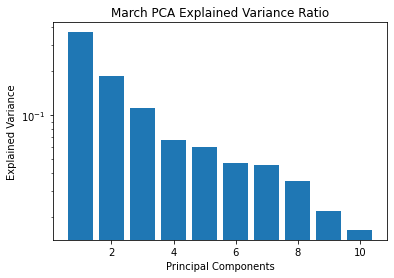

In [ ]:
#March PCA

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Used: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#Standardize the data

month = 3 #conduct separate analyses by calendar month
yrs = (2011, 2023)

#save function as variable
dfmarch = concatwx(month, yrs, asosstn)

#16 features
#pcaexcl = ['maxsdrct', 'amint', 'pmint'] #cols to exclude from pca
features  = ['mintmpf', 'maxtmpf', '8amtmpf', '4pmtmpf', 'maxdwpf', 'maxsknt', 'pctovc', 'meanrh', 'minalt', 'minvis', 'minfeel', 'maxfeel', 'pctpcp', 'pctmdt', 'pctsn', 'maxsdrct2']

#Seperate out the features
x = dfmarch.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#remove nan value
x = np.nan_to_num(x)

#Create PCA
marchpca = PCA(n_components=10)
principalComponents = marchpca.fit_transform(x)

#Dataframe of principal components
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])

principalDf.head()

#PCA Explained Variance Ratio

a = [1,2,3,4,5,6,7,8,9,10]
plt.bar(a,marchpca.explained_variance_ratio_)
plt.yscale('log')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('March PCA Explained Variance Ratio')

marchpca.explained_variance_ratio_

#to help with the correlation matrix append the PCA-transformed weather data and save everything
cyclandPCA = pd.concat([dfmarch, principalDf], axis=1)
cyclandPCA.to_csv(path_or_buf = './concatDFs/x_transformed.csv')

#Our first five components explain 84% of the variance in our data
#If there was more correlation between the features there would be fewer dimensions, but this plot shows that there is not a complete correlation between any of the features

#Repeat this for July and October by changing months.